In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sympy import *
sns.set()

# Root Finding
![image.png](attachment:b7bb6e35-eccf-423f-810a-17b552edc51b.png)

In [ ]:
class RootFinding:
    x = symbols("x")

    def __init__(self):
        self.right = 0.865474
        self.TOL = 0.1e-10
        self.error = 0.5e-4

    def generate_x(self):
        return self.x

    def bisectionMethod(self,start=0, end = 1,TOL=0.1e-10,max_iteration = 500):

        # function definition

        func = cos(self.x) - self.x**3

        a0 = start
        b0 = end
        iteration = 0

        while (b0-a0)/2 > self.TOL and iteration <= max_iteration:
            iteration += 1
            mid = (a0+b0)/2
            error = np.abs(mid - float(self.right))
            if error < 0.5e-4:
                self.printHelper(iteration,error,mid)
                return mid

            if self.f(func,mid)*self.f(func,b0) < 0:
                a0 = mid
            else:
                b0 = mid

        return "max_iteration_reached"


    def newtonMethod(self,max_iteration = 10000,initial = 0.3,explore=False):
        
        func = cos(self.x) - self.x ** 3
        first_diff = diff(func,self.x)

        iteration = 0
        x0 = initial
        while iteration <= max_iteration:
            iteration += 1
            x0 -= float(self.f(func,x0))/float(self.f(first_diff,x0))
            error = float(x0-self.right)
            if float(x0-self.right) < self.error:
                self.printHelper(iteration,error,x0)
                if explore:
                    return iteration
                else:
                    return x0

        print("max_iteration_reached")


    def exploreNewton(self):
        initial_choice = np.linspace(0.1,1,100)
        iteration_step_list = []
        for initial in initial_choice:
            iteration_step_list.append(self.newtonMethod(initial = initial,explore=True))

        plt.plot(initial_choice,iteration_step_list)
        plt.show()

    # 正确解法
    def secantMethod(self,max_iteration=10000,ini0 = 0, ini1 = 1):
        func = cos(self.x) - self.x**3

        x0 = ini0
        x1 = ini1
        iteration = 0

        while iteration <= max_iteration:
            iteration += 1
            error = np.abs(x0-self.right)
            # 由于x0最先被计算出来，因此我们只要6次就可以得到结果
            if error < self.error:
                self.printHelper(iteration,error,x1)
                return x0

            # 动态规划的时间优化方法，作业中是错误的方法
            if iteration % 2 == 0:
                x1 = x0 - (x0 - x1)*(self.f(func,x0)/float(self.f(func,x0)-self.f(func,x1)))
            else:
                x0 = x1 - (x1 - x0) * (self.f(func, x1) / float(self.f(func, x1) - self.f(func, x0)))


        return "max_iteration_reached"


    # 需要对函数做一定的变换才能收敛
    def fixedPoint(self,max_iteration=10000,init=0,answer = 0.60352):
        # sympy使用real_root求幂
        func_list = [cos(self.x) - self.x**3, real_root(cos(self.x)-self.x,3), cos(self.x)/(self.x**2+1)]


        for func in func_list:
            print("Trying function:{}".format(func))
            iteration = 0
            x1 = init
            while iteration <= max_iteration:
                iteration += 1
                x1 = self.f(func,x1)
                error = np.abs(x1-answer)
                if error < self.error:
                    print("Root found for function {}".format(func))
                    self.printHelper(iteration,error,x1)
                    return x1

            print("max_iteration_reached for func {}".format(func))

    def printHelper(self,iteration,error,rootValue):
        print("Iteration spent:{0}\nError: {1}\nRoot found: {2}".format(iteration,error,rootValue))

    def f(self,func,value):
        return float(func.evalf(subs={self.x:value}))




# Interpolation

In [ ]:
class Interpolation:
    
    def __init__(self):
        pass
    
     # Choose the interpolate the points and plot out the desired graph
    def interpolation(self,func,mode="poly",num_points = 10):
        # Python 函数闭包
        # https: // blog.csdn.net / register_2 / article / details / 80225970


        # 给多项式造轮子
        def constructA(x_list):
            num_points = len(x_list)
            vstack_rows = []
            for i in range(len(x_list)):
                stacked_matrix = np.array([x_list[i]**j for j in range(num_points-1,-1,-1)])
                vstack_rows.append(stacked_matrix)
            A = np.vstack(vstack_rows)
            return A

            # 使用numpy的广播机制

        def constructB(y_true):
            return np.array(y_true).reshape(len(y_true),1)


        # 用于插值
        x_list = np.linspace(1,num_points,num_points)
        y_true = [self.f(func,x) for x in x_list]


        # 用于画原图
        x_graph = np.linspace(1,10,10000)
        y_graph = [self.f(func,x) for x in x_graph]


        plt.plot(x_graph,y_graph,label="original")
        plt.legend()
        # plt.show()


        # num_points个点，我们需要num_points-1次的多项式
        if mode == "poly":
            A = constructA(x_list)
            b = constructB(y_true)

            # 返回一个(n,1)的向量
            x = np.linalg.solve(A,b)


        # 两两连线即可
        elif mode == "linear":
            

        elif mode == "Lagrange":
            pass

        elif mode == "":
            pass





In [ ]:
practice = NumericalMethod()

# Lecture 1&2

# BisectionMethod
# practice.bisectionMethod()


# NewtonMethod
# practice.newtonMethod()
# practice.exploreNewton()


# SecantMethod
# practice.secantMethod()


# fixedPoint
# practice.fixedPoint()



# Lecture 3
# Interpolation
# graph_x = practice.generate_x()
# func = graph_x**2
# x_list = np.linspace(0,5,100)
# plt.plot(x_list,[func.evalf(subs={graph_x:value}) for value in x_list])
# plt.show()

# test = np.array([1,2,3])
# test2 = np.array([2,4,5])
# print(np.vstack([test,test2]))

# PlayGround

In [8]:
t1 = np.array([1,2,3])
t2 = np.array([2,3,4])

In [5]:
t1 @ t2

20

In [7]:
A = np.array([[1,2,3],[2,3,5],[7,8,9]])
b = np.array([1,3,6])
np.linalg.solve(A,b)

array([ 1.83333333, -2.16666667,  1.16666667])

In [12]:
import math
import scipy

In [10]:
math.factorial(5)

120

In [16]:
func = lambda x: x**3
scipy.misc.derivative(func,2,n=1)

13.0

In [17]:
import matplotlib.pyplot as plt

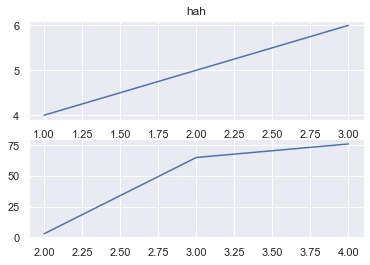

In [25]:
fig,ax = plt.subplots(2,1)
ax[0].plot([1,2,3],[4,5,6])
ax[0].set_title("hah")
ax[1].plot([2,3,4],[3,65,76])

In [2]:
import numpy as np

In [7]:
identity = np.eye(3)

In [4]:
temp = np.array([1,2,3])

In [6]:
temp[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [8]:
identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [9]:
identity[1:,1]

array([1., 0.])

In [10]:
identity[2:]

array([[0., 0., 1.]])

In [11]:
ex = np.array([[1,2,3],[4,5,6],[7,8,9]])
ex

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
factor = ex[1:,1]/ex[1,1]


In [14]:
ex[1:,1]

array([5, 8])

In [16]:
factor

array([1. , 1.6])

In [21]:
factor[:,np.newaxis]

array([[1. ],
       [1.6]])

In [19]:
ex[1:,1]=np.array([1,2])

In [20]:
ex

array([[1, 2, 3],
       [4, 1, 6],
       [7, 2, 9]])

In [22]:
b = np.array([1,2,3])

In [23]:
b[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [24]:
n1 = np.array([[1,2],[3,4]])
n2 = np.array([[3,4],[5,7]])
n1/n2

array([[0.33333333, 0.5       ],
       [0.6       , 0.57142857]])

In [27]:
x=np.diag((1,2,3))   ##写入对角阵x
x    

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [31]:
##输出对角阵x
a,b=np.linalg.eig(x) ##特征值赋值给a，对应特征向量赋值给b 

In [32]:
a


array([1., 2., 3.])

In [33]:
b

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [34]:
mat1 = np.array([[1,2,3],[5,4,5],[3,6,7]])
mat2 = np.array([[3,6,7],[7,7,9],[1,2,3]])

In [35]:
mat1 / mat2

array([[0.33333333, 0.33333333, 0.42857143],
       [0.71428571, 0.57142857, 0.55555556],
       [3.        , 3.        , 2.33333333]])

# Numpy一些功能点整理




## 生成一个identity matrix

In [39]:
identity = np.eye(3)
identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Numpy的幂


In [40]:
t1 = np.array([1,2,3])

In [44]:
np.power(t1,3)

array([ 1,  8, 27], dtype=int32)

In [45]:
np.power(t1,1/3)

array([1.        , 1.25992105, 1.44224957])

In [46]:
np.power(t1,4)

array([ 1, 16, 81], dtype=int32)

## Numpy的传播

In [48]:
t1 = np.array([2,3,4,5])

In [50]:
t1.shape[0]

4

In [56]:
order = 2 # 最高次方是2
res = np.zeros((t1.shape[0],order+1))

In [65]:
for i in range(order+1):
    res[:,i] = t1**i

In [66]:
res

array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])